In [1]:
import zipfile
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame()

with zipfile.ZipFile("archive.zip") as zip:
    for file in zip.filelist:
        with zip.open(file.filename) as f:
            df = pd.concat([df, pd.read_csv(f)])


In [3]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
2888,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
2889,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
2890,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
2891,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [4]:
df = df[df["Symbol"] == "BTC"]

In [5]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [23]:
sub_df = df[["Close", "Date"]]

In [24]:
sub_df

,Close,Date
0,144.539993,2013-04-29 23:59:59
1,139.000000,2013-04-30 23:59:59
2,116.989998,2013-05-01 23:59:59
3,105.209999,2013-05-02 23:59:59
4,97.750000,2013-05-03 23:59:59
...,...,...
2986,33897.048590,2021-07-02 23:59:59
2987,34668.548402,2021-07-03 23:59:59
2988,35287.779766,2021-07-04 23:59:59
2989,33746.002456,2021-07-05 23:59:59


In [28]:
sub_df["Date"] = pd.to_datetime(sub_df["Date"])
sub_df = sub_df.set_index("Date")

/tmp/ipykernel_7150/672484594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["Date"] = pd.to_datetime(sub_df["Date"])


In [34]:
from adtk.detector import InterQuartileRangeAD
from adtk.visualization import plot

In [47]:
iqr_detector = InterQuartileRangeAD(c=1.5)

In [48]:
anomalies = iqr_detector.fit_detect(sub_df)

[<Axes: >]

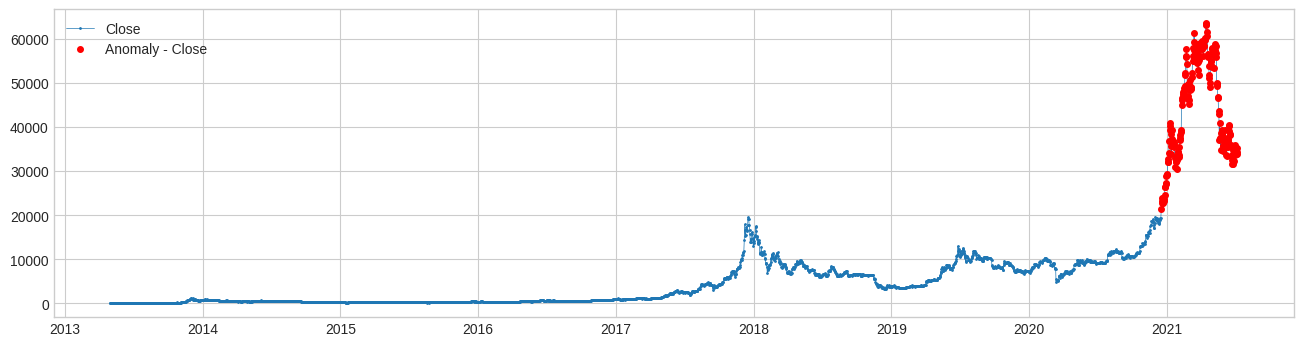

In [49]:
plot(sub_df, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")